# Exploring Pandas with NYC Flights Dataset

R users will recognize this famous
dataset as a favorite of Hadley Wickham, author of dplyr.  No matter, we can use
it with pandas as
well.

This dataset will give us flight delay data from all
flights departing from the three NYC airports (JFK, LGA, EWR) in the year 2013.

## Step-1: Get Data

In [16]:
# get data
import os
import urllib.request

data_location = "../data/nycflights13/flights.csv.gz"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/nycflights13/flights.csv.gz'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        urllib.request.urlretrieve(data_url, data_location)
        print ('Downloading : ', data_url)
print('data_location :', data_location)  

data_location : flights.csv.gz


In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format
flights = pd.read_csv(data_location)
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


## Step-2: Calculate Arrival Delay

Let us focus on some summary and visualizations that we can do here. Let's start
out by finding the average delay by month.  We'll also do a matlibplot on it.

In [18]:
# first let's extract 'arr_delay' column
flights['arr_delay']

0         11.00
1         20.00
2         33.00
3        -18.00
4        -25.00
          ...  
336771      NaN
336772      NaN
336773      NaN
336774      NaN
336775      NaN
Name: arr_delay, Length: 336776, dtype: float64

In [19]:
# then let's calculate average / mean
flights['arr_delay'].mean()

6.89537675731489

In [20]:
## Now that we have done that, let's group by month and do the same

mean_delay_by_month = flights.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1     6.13
2     5.61
3     5.81
4    11.18
5     3.52
6    16.48
7    16.71
8     6.04
9    -4.02
10   -0.17
11    0.46
12   14.87
Name: arr_delay, dtype: float64

<AxesSubplot:title={'center':'Mean Delay By Month'}, xlabel='month'>

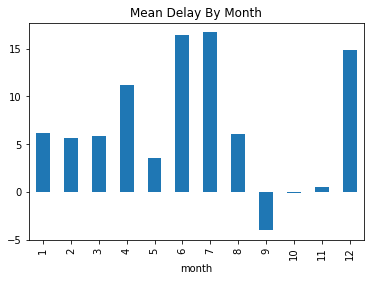

In [21]:
## Plot this

mean_delay_by_month.plot(kind='bar', title="Mean Delay By Month")


Notice that flights in two months actually have negative delay.  No doubt
airlines "pad" flight times to achieve better results.

## Step-3: Airport Specific Delays

One would guess that
flights to certain airports may have different results. For example, flights to
Chicago (ORD) would no doubt be affected by winter weather. Let's take a look at
that.

In [22]:
## First step, extract all flights to Chicago (ORD)

flights[flights.dest == 'ORD']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,2013-01-01 05:00:00
9,2013,1,1,558.00,600,-2.00,753.00,745,8.00,AA,301,N3ALAA,LGA,ORD,138.00,733,6,0,2013-01-01 06:00:00
25,2013,1,1,608.00,600,8.00,807.00,735,32.00,MQ,3768,N9EAMQ,EWR,ORD,139.00,719,6,0,2013-01-01 06:00:00
38,2013,1,1,629.00,630,-1.00,824.00,810,14.00,AA,303,N3CYAA,LGA,ORD,140.00,733,6,30,2013-01-01 06:00:00
57,2013,1,1,656.00,700,-4.00,854.00,850,4.00,AA,305,N4WNAA,LGA,ORD,143.00,733,7,0,2013-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336645,2013,9,30,"1,928.00",1940,-12.00,"2,043.00",2120,-37.00,AA,363,N4XBAA,LGA,ORD,109.00,733,19,40,2013-09-30 19:00:00
336669,2013,9,30,"1,953.00",2000,-7.00,"2,119.00",2132,-13.00,UA,695,N853UA,LGA,ORD,107.00,733,20,0,2013-09-30 20:00:00
336675,2013,9,30,"1,958.00",2005,-7.00,"2,119.00",2130,-11.00,MQ,3604,N511MQ,EWR,ORD,102.00,719,20,5,2013-09-30 20:00:00
336696,2013,9,30,"2,017.00",2022,-5.00,"2,132.00",2155,-23.00,B6,105,N298JB,JFK,ORD,112.00,740,20,22,2013-09-30 20:00:00


In [23]:
## Now do the same calculation

mean_delay_by_month_ord = flights[(flights.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
mean_delay_by_month_ord


month
1     7.29
2     3.68
3    -2.70
4    19.18
5     7.94
6    13.30
7     8.41
8     4.26
9    -4.75
10   -1.60
11    2.07
12   16.46
Name: arr_delay, dtype: float64

<AxesSubplot:title={'center':'Mean Delay By Month (Chicago)'}, xlabel='month'>

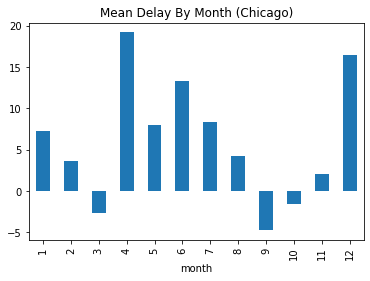

In [24]:
mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month (Chicago)")


Flights to Los Angeles (LAX)
month
1    -4.16
2    -7.60
3    -5.28
4     3.09
5    -7.15
6    13.01
7     8.19
8     1.03
9    -8.72
10   -1.21
11   -0.10
12   10.72
Name: arr_delay, dtype: float64


<AxesSubplot:title={'center':'Mean Delay By Month (Los Angeles)'}, xlabel='month'>

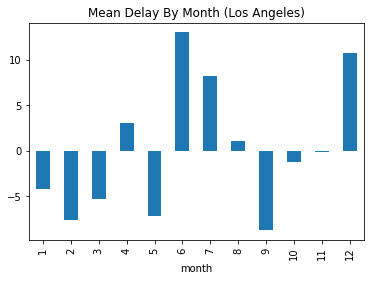

In [25]:
# Let's try Los Angeles and compare that

mean_delay_by_month_lax = flights[(flights.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Los Angeles (LAX)")
print(mean_delay_by_month_lax)

mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")


## Step-4: Delay by Airline

Perhaps we would like to see which Airline carrier is the best for delays.  Here
we have some plots to do that.

carrier
9E    7.38
AA    0.36
AS   -9.93
B6    9.46
DL    1.64
EV   15.80
F9   21.92
FL   20.12
HA   -6.92
MQ   10.77
OO   11.93
UA    3.56
US    2.13
VX    1.76
WN    9.65
YV   15.56
Name: arr_delay, dtype: float64


Text(0.5, 1.0, 'Average Arrival Delay by Carrier in 2008, All  airports')

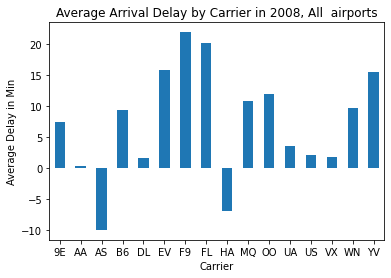

In [26]:
# Examine if specific carrier will create different delay impact
arr_delay_by_carrier = flights.groupby('carrier')['arr_delay'].mean()
print (arr_delay_by_carrier)

# plot this
arr_delay_by_carrier.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All  airports')

We see that F9 (Frontier Airlines) is among the worst in terms of delays, while
Hawaiian (HA) is among the best.

## Step-5: Joins

We have a couple of other tables in our dataset: Weather, and
airports. Let's look at these two tables and see if we can perform joins.

In [27]:
import os
import urllib.request

data_location = "../data/nycflights13/weather.csv.gz"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/nycflights13/weather.csv.gz'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        urllib.request.urlretrieve(data_url, data_location)
        print ('Downloading : ', data_url)
print('data_location :', data_location)  

weather = pd.read_csv(data_location)
weather

data_location : weather.csv.gz


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.00,10.36,11.92,0.00,"1,013.90",10.00,2012-12-31 19:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.00,13.81,15.89,0.00,"1,013.00",10.00,2012-12-31 20:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.00,12.66,14.57,0.00,"1,012.60",10.00,2012-12-31 21:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.00,13.81,15.89,0.00,"1,012.70",10.00,2012-12-31 22:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.00,14.96,17.22,0.00,"1,012.80",10.00,2012-12-31 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340.00,13.81,15.89,0.00,"1,017.10",10.00,2013-12-30 14:00:00
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330.00,17.26,19.86,0.00,"1,018.80",10.00,2013-12-30 15:00:00
26127,LGA,2013,12,30,21,32.00,15.08,49.19,340.00,14.96,17.22,0.00,"1,019.50",10.00,2013-12-30 16:00:00
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320.00,17.26,19.86,0.00,"1,019.90",10.00,2013-12-30 17:00:00


In [28]:
flights_withweather = pd.merge(flights, weather, how='left', on=['year','month', 'day', 'hour', 'origin'])
flights_withweather

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,39.92,26.06,57.33,260.00,13.81,15.89,0.00,"1,011.90",10.00,2013-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,68.00,48.92,50.44,20.00,5.75,6.62,0.00,"1,018.40",10.00,2013-09-30 09:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,66.92,51.98,58.65,160.00,9.21,10.59,0.00,"1,015.40",10.00,2013-09-30 17:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,60.98,51.08,69.86,NaN,5.75,6.62,0.00,"1,018.60",10.00,2013-09-30 07:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,60.08,51.98,74.56,360.00,4.60,5.30,0.00,"1,018.50",10.00,2013-09-30 06:00:00


In [29]:
import os
import urllib.request

data_location = "../data/nycflights13/airports.csv.gz"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/nycflights13/airports.csv.gz'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        urllib.request.urlretrieve(data_url, data_location)
        print ('Downloading : ', data_url)
print('data_location :', data_location)  

airports = pd.read_csv(data_location)
airports

data_location : airports.csv.gz


,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.13,-80.62,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.46,-85.68,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.99,-88.10,801,-6,A,America/Chicago
3,06N,Randall Airport,41.43,-74.39,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.07,-81.43,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.08,-108.79,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.30,-72.93,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.74,-75.55,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.90,-77.01,76,-5,A,America/New_York


In [30]:
flights_withairport = pd.merge(flights_withweather, airports, how='left', left_on='dest', right_on='faa')
flights_withairport

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,NaN,NaN,IAH,George Bush Intercontinental,29.98,-95.34,97.00,-6.00,A,America/Chicago
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,NaN,NaN,IAH,George Bush Intercontinental,29.98,-95.34,97.00,-6.00,A,America/Chicago
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,NaN,NaN,MIA,Miami Intl,25.79,-80.29,8.00,-5.00,A,America/New_York
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,10.00,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.64,-84.43,"1,026.00",-5.00,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,10.00,2013-09-30 09:00:00,DCA,Ronald Reagan Washington Natl,38.85,-77.04,15.00,-5.00,A,America/New_York
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,10.00,2013-09-30 17:00:00,SYR,Syracuse Hancock Intl,43.11,-76.11,421.00,-5.00,A,America/New_York
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,10.00,2013-09-30 07:00:00,BNA,Nashville Intl,36.12,-86.68,599.00,-6.00,A,America/Chicago
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,10.00,2013-09-30 06:00:00,CLE,Cleveland Hopkins Intl,41.41,-81.85,791.00,-5.00,A,America/New_York
